In [26]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import sys
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
sys.path.insert(0, "D:/GIUSEPPE/Universita/TesiMagistrale/Kuramoto/Codice/modified")
%load_ext autoreload
%autoreload 2
from kuramoto.kuramotov2 import *
from kuramoto.plotting import *
# the above two lines are needed in order to see the modifications in python files without restarting vscode, 2 means that all modules will be reimported
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.6)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
# Parameters
dt = 0.01 # time step
t_max = 50 # max time of the simulation
n_steps = int(t_max/dt)
A = 1
B = 2 # when the internal coupling is 0 there is chaotic behavior for B=5, periodic for lower values, such as B=2.5
delta = 1 # width of the frequency's lorentzian distribution 

# First network
N1 = 500 # number of nodes
coupling1 = 0.2 # coupling between oscillators (will be normalized by the number of interactions)
omega_f1 = 1.0 # frequence of the external field


# Second network
N2 = 500
coupling2 = 0.0
omega_f2 = omega_f1


# Creation of the graphs
# graph_nx1 = nx.complete_graph(N1)
# graph_nx2 = nx.complete_graph(N2)
graph_nx1 = nx.erdos_renyi_graph(n = N1, p = 6/(N1-1), directed = False); title1 = 'Erdos-Renyi'
graph_nx2 = nx.erdos_renyi_graph(n = N2, p = 6/(N2-1), directed = False); title2 = 'Erdos-Renyi'
# graph_nx1 = nx.barabasi_albert_graph(N1, m = 3); title1 = 'Barabasi-Albert'
# graph_nx2 = nx.barabasi_albert_graph(N2, m = 3); title2 = 'Barabasi-Albert'

graph1 = nx.to_numpy_array(graph_nx1)
graph2 = nx.to_numpy_array(graph_nx2)

deg1 = [deg1 for (node1, deg1) in graph_nx1.degree]
deg2 = [deg2 for (node2, deg2) in graph_nx2.degree]
model = Kuramoto_com(coupling1=coupling1, coupling2 = coupling2, dt=dt, t_max=t_max, n_nodes1=len(graph1), n_nodes2=len(graph2),
                     omega_f1 = omega_f1, omega_f2 = omega_f2, A = A, B = B, delta = delta, deg1 = deg1, deg2 = deg2)

In [31]:
print(f'Initial parameters \n')
print(f'number of nodes: N1 = {N1}, N2 = {N2}')
print(f'coupling: c1 = {coupling1}, c2 = {coupling2}')
print(f'A = {A}')
print(f'B = {B}')
print(f'scale = {delta}')
print(f'external frequency = {omega_f1}')
print(f'time step dt = {dt}')
print(f'number of temporal steps {n_steps}')
act_mat = model.run(adj_mat1 = graph1, adj_mat2 = graph2)
ord1 = [phase_coherence_mod_numba(vec, deg1) for vec in act_mat[:N1].T]
ord2 = [phase_coherence_mod_numba(vec, deg2) for vec in act_mat[N1:N1+N2].T]

Initial parameters 

number of nodes: N1 = 500, N2 = 500
coupling: c1 = 0.2, c2 = 0.0
A = 1
B = 2
scale = 1
external frequency = 1.0
time step dt = 0.01
number of temporal steps 5000


D:\GIUSEPPE/Universita/TesiMagistrale/Kuramoto/Codice/modified\kuramoto\kuramotov2.py:321: ComplexWarning: Casting complex values to real discards the imaginary part
  if self.deg2[i] != 0:
D:\GIUSEPPE/Universita/TesiMagistrale/Kuramoto/Codice/modified\kuramoto\kuramotov2.py:322: ComplexWarning: Casting complex values to real discards the imaginary part
  ri2[i] = np.abs(ri2[i])/self.n_nodes2


array([<Axes: xlabel='t', ylabel='b(t)'>,
       <Axes: title={'center': 'First network'}, xlabel='t', ylabel='r'>,
       <Axes: title={'center': 'Second network'}, xlabel='t', ylabel='r'>],
      dtype=object)

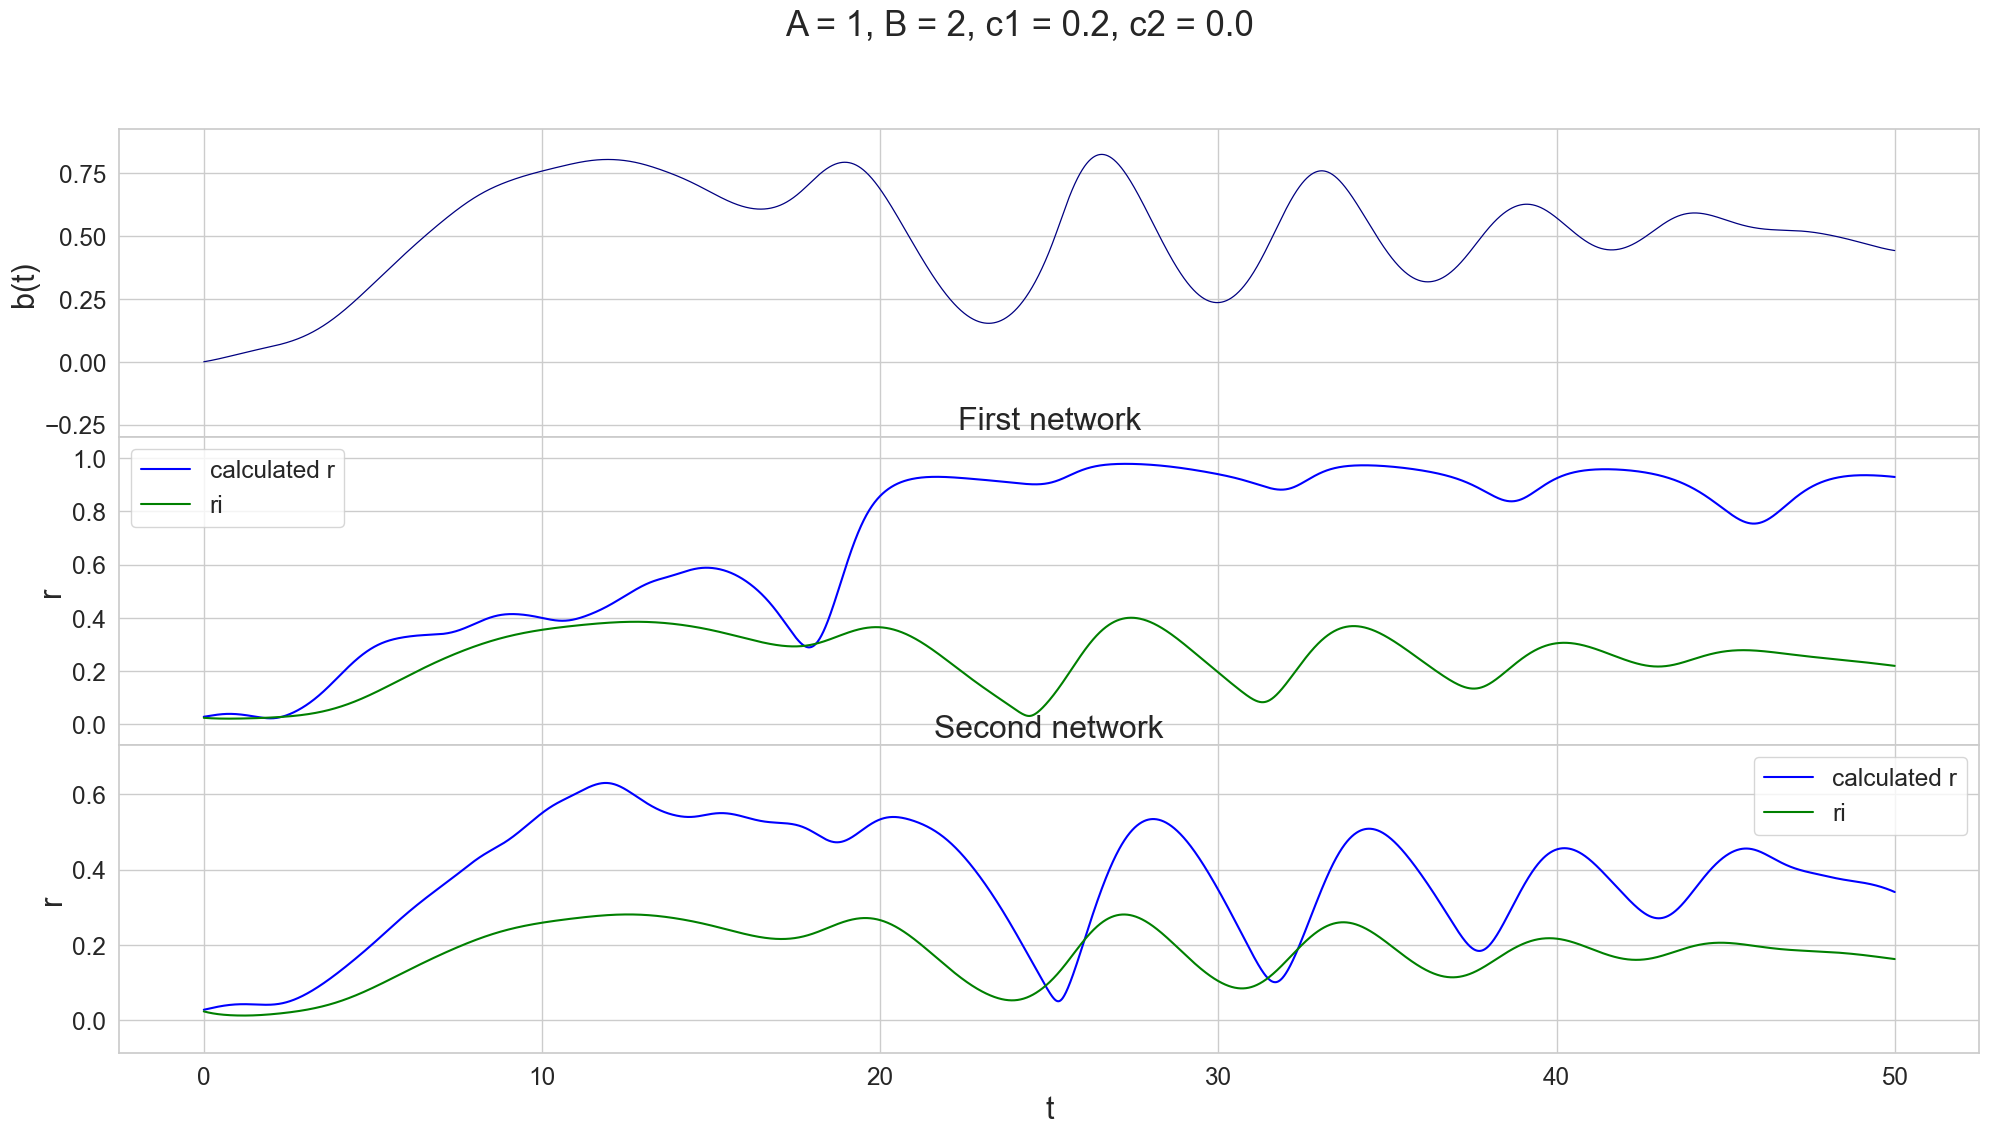

In [32]:
b = act_mat[-1]
ri1 = act_mat[N1 + N2 :2*N1 + N2].T
ri2 = act_mat[2*N1 + N2 :2*N1 + 2*N2].T
r1 = np.zeros(n_steps)
# r2 = np.zeros(n_steps)
# beta = 2
# d1 = np.sum(deg1[i]**beta for i in range (N1))
# d2 = np.sum(deg2[i]**beta for i in range (N2))

# for i in range(n_steps):
#     for j in range(N1):
#         r1[i] += ri1[i,j] * deg1[j]**beta
# for i in range(n_steps):
#     for j in range(N2):
#         r2[i] += ri2[i,j] * deg2[j]**beta
# r1 = np.array(r1) / d1
# r2 = np.array(r2) / d2

r1_d = act_mat[-5]
r2_d = act_mat[-4]

# r1_dd = global_order_param(act_mat[:N1], graph1, n_steps, beta)
# r2_dd = global_order_param(act_mat[N1:N1+N2], graph2, n_steps, beta)
# plot_field_order_three(b, ord1, r1_d, r1, ord2, r2_d, r2, dt, t_max, title = f'B = {B}, c1 = {coupling1}, c2 = {coupling2}, beta = {beta}')
plot_field_order_two(b, ord1, ord2, r1_d, r2_d, dt, t_max, title = f'A = {A}, B = {B}, c1 = {coupling1}, c2 = {coupling2}')

# plot_field(b, dt, t_max)
# plot_three_r(ord1, r1_d, r1, ord2, r2_d, r2, dt, t_max, title = f'B = {B}, c1 = {coupling1}, c2 = {coupling2}, beta = {beta}')
# plot_diff_r(r1, ord1, r2, ord2, dt, t_max, title = f'A = {A}, B = {B}, c1 = {coupling1}, c2 = {coupling2}')

# plot_all(act_mat[:N1], act_mat[N1:N1+N2], ord1, ord2, act_mat[-1], dt, t_max)